# Solving Time-Independant Shrodinger Equation for Harmonic Oscillator
$\hat{H}|\Psi\rangle = \hat{T} + \hat{V} |\Psi\rangle$


In [506]:
import numpy as np
import math
import matplotlib.pyplot as mlt
from numpy import pi

In [507]:
#defining all the necessary constants here
h_bar    = 1 #atomic unit
m        = 1 #mass
w        = 1 #omega
com_term = h_bar**2 /(2*m) 

In [508]:
def E_psi(div):
    H = H_psi(div)
    E, psi = np.linalg.eigh(H)
    return E
def H_psi(div):
    R = np.linspace(-10,10,div)
    x = R[1] - R[0]
    v = V(R)
    t = T_with_fourier_transform(len(R),x)
    H = v + t
    return H
def array_for_V(R):
    return 0.5 * m * w**2 * R**2
def V(R):
    V_arr = array_for_V(R)
    cap_V = np.zeros((len(R),len(R)))
    for i in range(0,len(R)):
        cap_V[i,i] = V_arr[i]
    return cap_V
def T_with_fourier_transform(n,del_x):
    k = np.pi/del_x
    cap_T = np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if(i==j):
                cap_T[i,j] = com_term * ((k**2)/3)*(1+(2/(n**2)))
            else:
                cap_T[i,j] = com_term * (2*k**2*(-1)**(j-i))/(n**2 * (np.sin(np.pi*(j-i)/n))**2)
    return cap_T     

In [509]:
def err_calc(limit):
    sum = 0
    dev_list = np.array(limit-5)
    for i in range(5,limit+1):
        temp = E_psi(i)
        for j in range(1,i):
            x = temp[j] - temp[j-1]
            err = (x - 0.5)**2
            sum += err
        dev = math.sqrt(sum/i)
        np.append(dev_list,dev)
        sum = 0
    return dev_list
def plt(limit):
    x_axis = np.array(limit-5)
    x_axis = range(5,limit)
    y_axis = np.array(limit-5)
    y_axis = err_calc(limit)
    mlt.plot(x_axis,y_axis)

ValueError: x and y must have same first dimension, but have shapes (95,) and (1,)

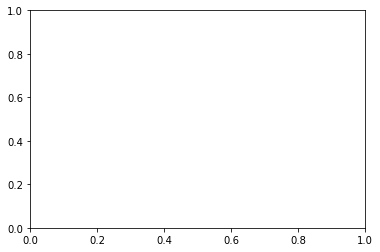

In [510]:
plt(100)